<a href="https://colab.research.google.com/github/kireayom16/classfiles/blob/main/Pr%C3%A1ctica22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `advertising.csv`.
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente las variables.

In [ ]:
# Tu código aquí
# Importar el dataframe desde google drive - /content/drive/MyDrive/Escuela/Maestria/3er Semestre/Programacion Analitica/Class data/advertising.csv

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Escuela/Maestria/3er Semestre/Programacion Analitica/Class data/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Parte 2: Análisis exploratorio de los datos
### 2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes
1. Grafica dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y `Sales`. Usa también regplot.
2. Interpreta visualmente la relación entre variables.

Se puede apreciar una relacion lineal muy fuerte entre publicidad en TV y ventas, lo mismo ocurre con la radio pero en menor medida y por ultimo la relacion mas debil es entre el periodico.

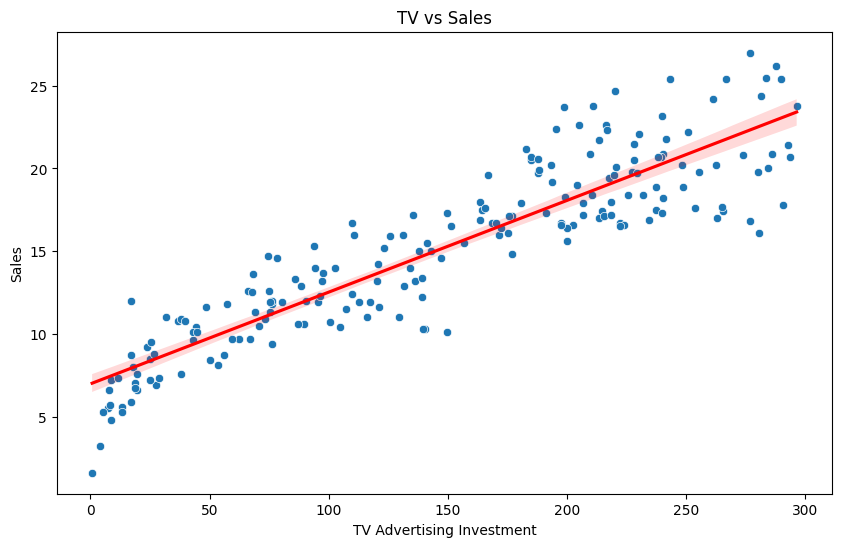

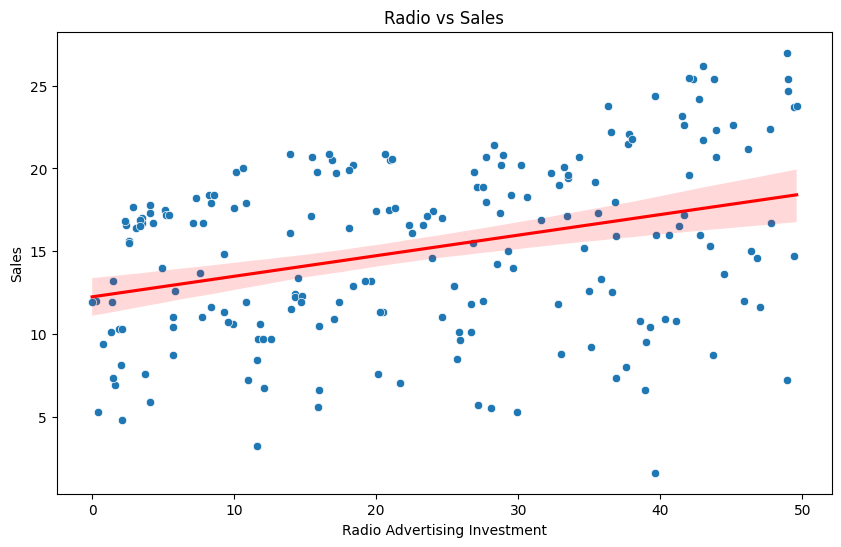

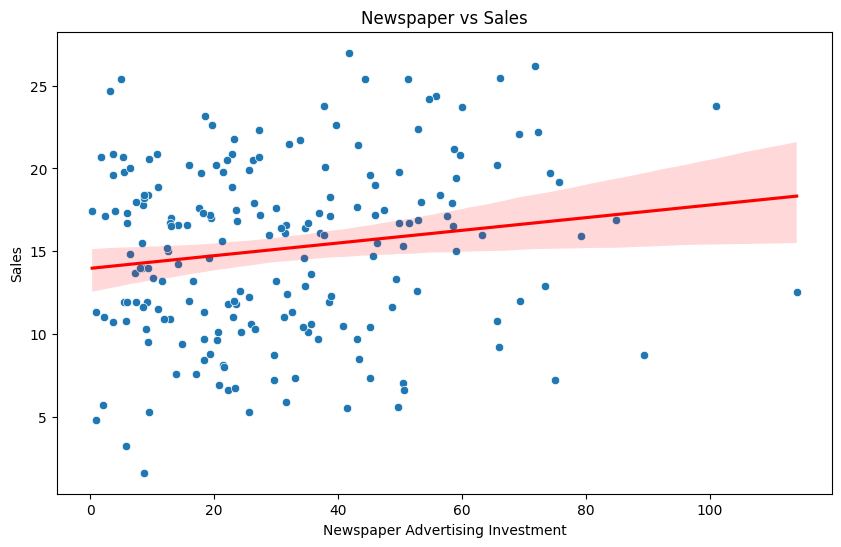

In [ ]:
# Gráficos de dispersión

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot y regplot | TV vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=df)
sns.regplot(x='TV', y='Sales', data=df, scatter=False, color='red')
plt.title('TV vs Sales')
plt.xlabel('TV Advertising Investment')
plt.ylabel('Sales')
plt.show()

# Scatter plot y regplot | Radio vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Radio', y='Sales', data=df)
sns.regplot(x='Radio', y='Sales', data=df, scatter=False, color='red')
plt.title('Radio vs Sales')
plt.xlabel('Radio Advertising Investment')
plt.ylabel('Sales')
plt.show()

# Scatter plot y regplot | Newspaper vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Newspaper', y='Sales', data=df)
sns.regplot(x='Newspaper', y='Sales', data=df, scatter=False, color='red')
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper Advertising Investment')
plt.ylabel('Sales')
plt.show()

### 2.2: Correlación entre variables
1. Calcula la matriz de correlación.
2. Visualízala con un heatmap.
3. Responde: ¿Qué variables están más correlacionadas con `Sales`?

TV

¿Hay correlación alta entre predictores?

No, la correlacion mas alta es entre radio y periodico de 0.35 lo cual no se considera una correlacion alta

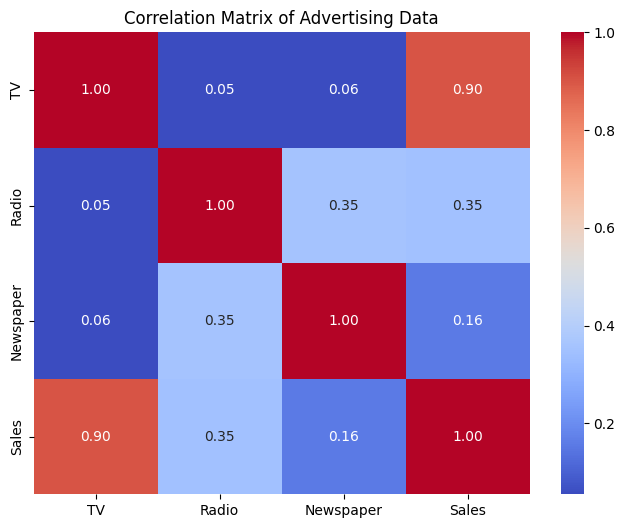

In [ ]:
# Correlación y heatmap
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Advertising Data')
plt.show()

## Parte 3. Multicolinealidad
1. Calcula el VIF (Variance Inflation Factor) para cada predictor.
2. Crea un diagrama de barras  para mostrar el  VIF
3. Interpreta si hay multicolinealidad:
- ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?

No

- ¿Qué implicaciones tiene esto para el modelo?

Debido a que el valor VIF es muy bajo (cercas de 1) significa que hay muy poca relacion entre la TV, radio y periodico, esto significa que un modelo de multicolinealidad no es muy bueno como uno de regresion lineal

VIF Data:
     feature       VIF
0      const  6.848900
1         TV  1.004611
2      Radio  1.144952
3  Newspaper  1.145187


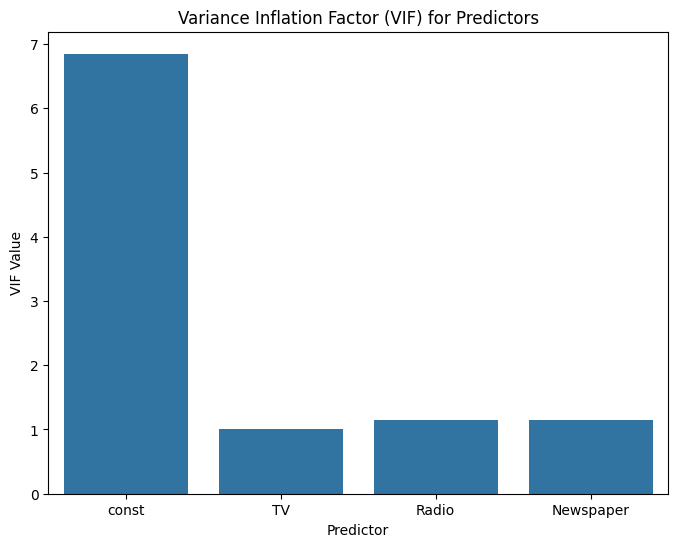

In [ ]:
#Multicolinealidad

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[['TV', 'Radio', 'Newspaper']]
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF Data:")
print(vif_data)

plt.figure(figsize=(8, 6))
sns.barplot(x='feature', y='VIF', data=vif_data)
plt.title('Variance Inflation Factor (VIF) for Predictors')
plt.xlabel('Predictor')
plt.ylabel('VIF Value')
plt.show()

## Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación

### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas?

In [ ]:
#ntrenamiento del Modelo (Todas las Variables Independientes)

from sklearn.linear_model import LinearRegression
import numpy as np

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

model = LinearRegression()
model.fit(X, y)

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: 4.625124078808653
Coefficients: [0.05444578 0.10700123 0.00033566]


### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?

Parece ser que tiene una tendencia hacia la normalidad pero se ven ciertos datos en los extremos que es posible que no permitan la normalidad

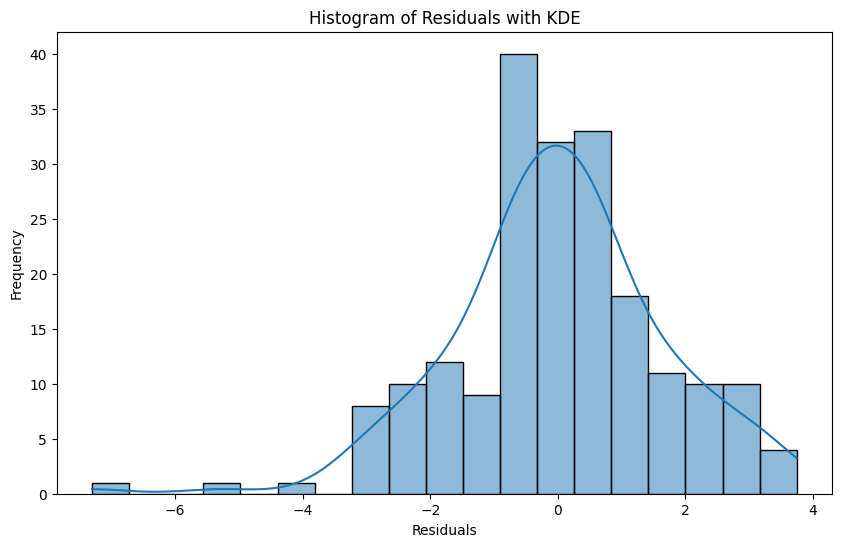

In [ ]:
#Normalidad de los residuos

import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X)

residuals = y - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals with KDE')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones?

No

¿Los residuos se dispersan aleatoriamente?

Es muy probable que si

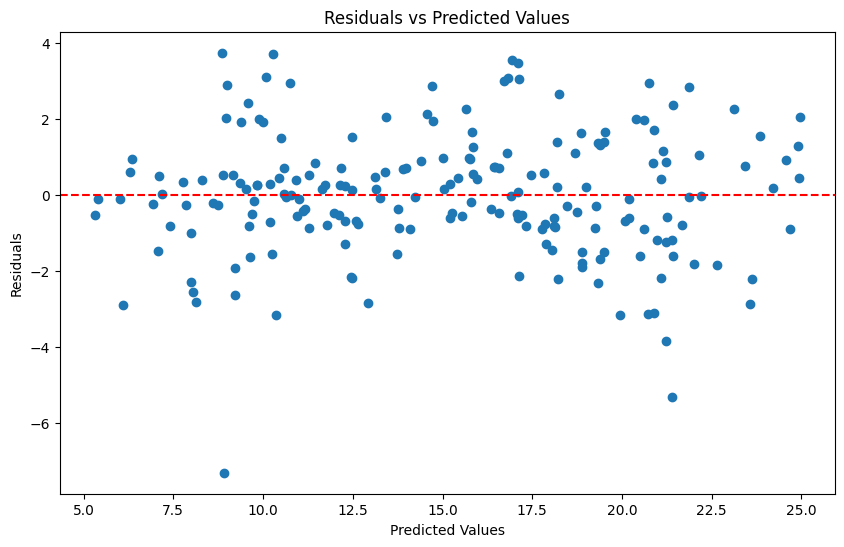

In [ ]:
# Homocedasticidad

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico:

a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal,

Efectivamente, los residuos si se distribuyen aproximadamente hacia una distribucion normal

b) Desviaciones sistemáticas indican asimetría o colas pesadas.

Si tiene colas pesadas

<Figure size 800x600 with 0 Axes>

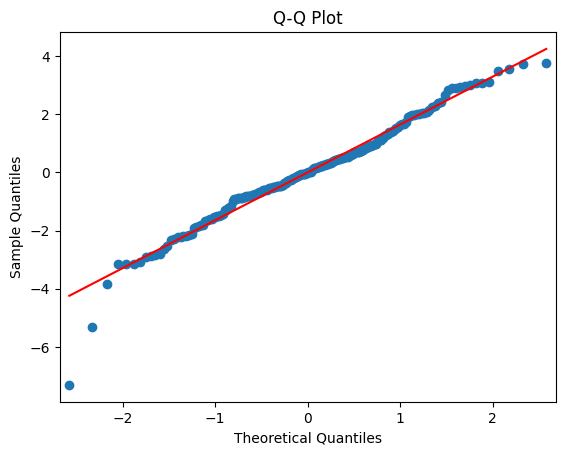

In [ ]:
#Q-Q Plot

import statsmodels.api as sm

plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

### 4.5. Evaluación del Modelo

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?

Debido a que existe un valor de R cuadrada de 0.9026, entonces existe una alta posibilidad de que el modelo sea correcto y tambien esto nos lo indica los valores de MSE que estan bajos, sin embargo, no son los suficientemente bueno como para considerarlos estadisticamente muy relevantes, se puede mejorar el modelo.


In [ ]:
#Evaluación del Modelo

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 2.706006147627315
Root Mean Squared Error (RMSE): 1.6449942697855562
R-squared (R²): 0.9025912899684558


### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3.¿Qué observas?¿Qué observas?

Obesrvo que los puntos si tienen una brecha pero sorprendentemente muy estrecha entre la linea diagonal

¿Qué información puedes obtener de esta gráfica?

Esta brecha pequeña indicia que existe algo de error en las predicciones pero suelen ser muy acertivas, lo que genera un buen modelo en el largo plazo

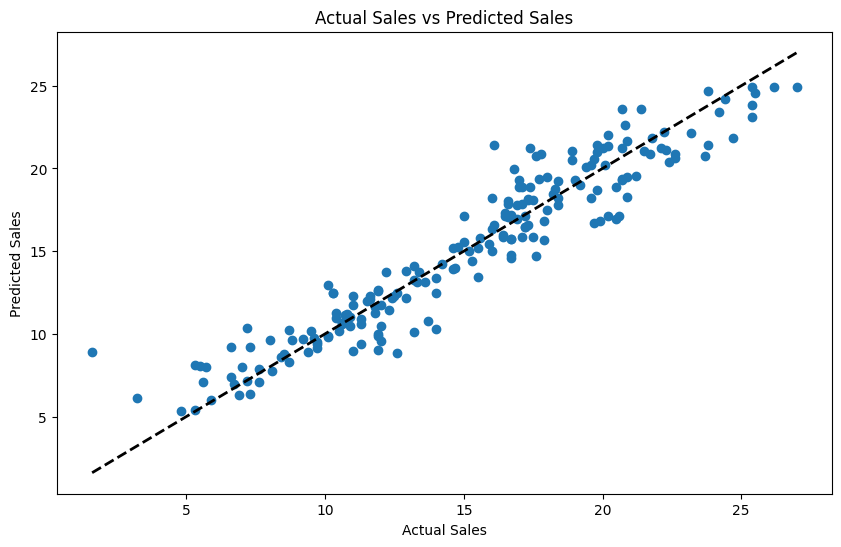

In [ ]:
#Visualización de las Predicciones

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs Predicted Sales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05?

 TV y Radio

 - ¿Cuál es la conclusión sobre esas variables?

Debido a que TV y Radio obtuvieron un valor menos a 0.05 podemos asumir que estas variables son estadisticamente significantes para predecir ventas en este modelo.

In [ ]:
#P-values

import statsmodels.api as sm

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X = sm.add_constant(X)

model_sm = sm.OLS(y, X).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 12 Oct 2025   Prob (F-statistic):           8.13e-99
Time:                        02:04:45   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

##Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

In [ ]:
from sklearn.linear_model import LinearRegression

X_new = df[['TV', 'Radio']]
y_new = df['Sales']

model_new = LinearRegression()
model_new.fit(X_new, y_new)

print(f"Intercept: {model_new.intercept_}")
print(f"Coefficients: {model_new.coef_}")

Intercept: 4.630879464097768
Coefficients: [0.05444896 0.10717457]


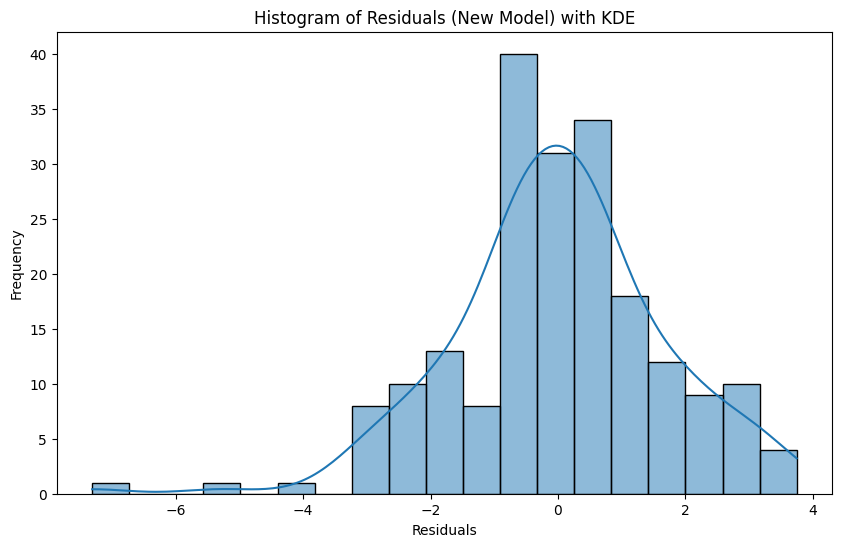

<Figure size 800x600 with 0 Axes>

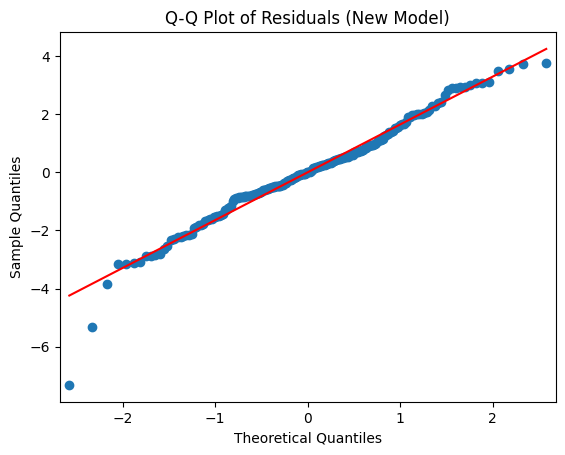

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

y_pred_new = model_new.predict(X_new)

residuals_new = y_new - y_pred_new

plt.figure(figsize=(10, 6))
sns.histplot(residuals_new, kde=True)
plt.title('Histogram of Residuals (New Model) with KDE')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sm.qqplot(residuals_new, line='s')
plt.title('Q-Q Plot of Residuals (New Model)')
plt.show()

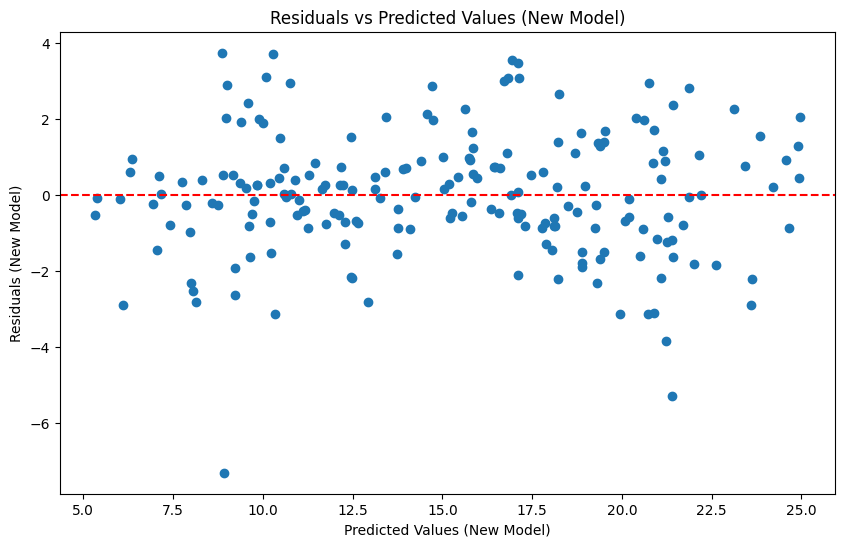

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_new, residuals_new)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (New Model)')
plt.xlabel('Predicted Values (New Model)')
plt.ylabel('Residuals (New Model)')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse_new = mean_squared_error(y_new, y_pred_new)

rmse_new = np.sqrt(mse_new)

r2_new = r2_score(y_new, y_pred_new)

print(f"Mean Squared Error (MSE) for the new model: {mse_new}")
print(f"Root Mean Squared Error (RMSE) for the new model: {rmse_new}")
print(f"R-squared (R²) for the new model: {r2_new}")

Mean Squared Error (MSE) for the new model: 2.7060525778834883
Root Mean Squared Error (RMSE) for the new model: 1.6450083823140502
R-squared (R²) for the new model: 0.9025896186081139


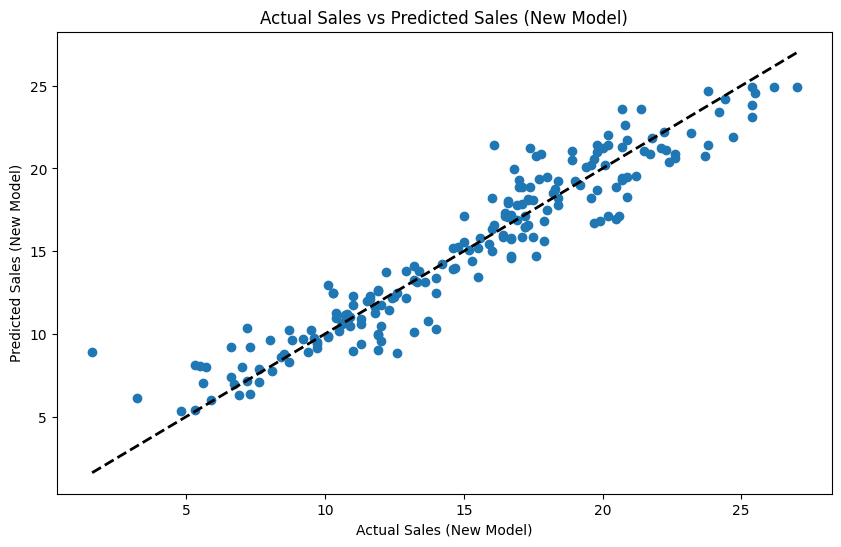

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_new, y_pred_new)
plt.xlabel("Actual Sales (New Model)")
plt.ylabel("Predicted Sales (New Model)")
plt.title("Actual Sales vs Predicted Sales (New Model)")
plt.plot([y_new.min(), y_new.max()], [y_new.min(), y_new.max()], 'k--', lw=2)
plt.show()

In [ ]:
import statsmodels.api as sm

X_new = sm.add_constant(X_new)

model_sm_new = sm.OLS(y_new, X_new).fit()

print(model_sm_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Sun, 12 Oct 2025   Prob (F-statistic):          2.39e-100
Time:                        02:04:47   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0

## Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

### 6.2: Normalidad de los residuos (Nuevo Modelo)

1. Calcula los residuos: `residuals_new = y_new - y_pred_new`.
2. Grafica un histograma con KDE de los residuos.
3. Grafica el Q-Q Plot.
4. ¿Los residuos parecen distribuirse normalmente?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

y_pred_new = model_new.predict(X_new)

residuals_new = y_new - y_pred_new

plt.figure(figsize=(10, 6))
sns.histplot(residuals_new, kde=True)
plt.title('Histogram of Residuals (New Model) with KDE')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sm.qqplot(residuals_new, line='s')
plt.title('Q-Q Plot of Residuals (New Model)')
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- const


In [ ]:
from sklearn.linear_model import LinearRegression

X_new = df[['TV', 'Radio']]
y_new = df['Sales']

model_new = LinearRegression()
model_new.fit(X_new, y_new)

print(f"Intercept: {model_new.intercept_}")
print(f"Coefficients: {model_new.coef_}")

Intercept: 4.630879464097768
Coefficients: [0.05444896 0.10717457]


### 6.3. Homocedasticidad (Nuevo Modelo)

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones?
3. ¿Los residuos se dispersan aleatoriamente?

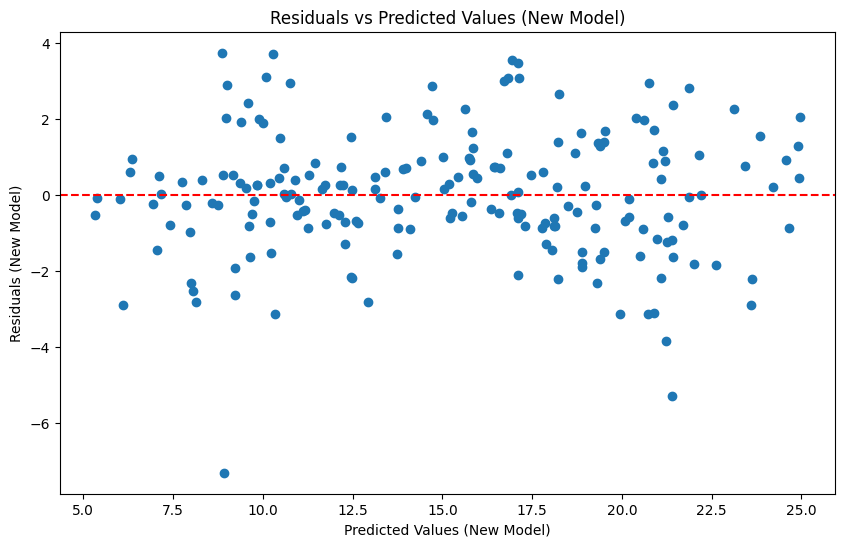

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_new, residuals_new)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (New Model)')
plt.xlabel('Predicted Values (New Model)')
plt.ylabel('Residuals (New Model)')
plt.show()

### 6.4. Evaluación del Modelo (Nuevo Modelo)

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación).
2. ¿Qué nos dicen estas métricas sobre el ajuste del nuevo modelo?

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse_new = mean_squared_error(y_new, y_pred_new)

rmse_new = np.sqrt(mse_new)

r2_new = r2_score(y_new, y_pred_new)

print(f"Mean Squared Error (MSE) for the new model: {mse_new}")
print(f"Root Mean Squared Error (RMSE) for the new model: {rmse_new}")
print(f"R-squared (R²) for the new model: {r2_new}")

Mean Squared Error (MSE) for the new model: 2.7060525778834883
Root Mean Squared Error (RMSE) for the new model: 1.6450083823140502
R-squared (R²) for the new model: 0.9025896186081139


### 6.5. Visualización de Predicciones (Nuevo Modelo)

1. Crea un gráfico comparando Sales reales vs Sales predichas para el nuevo modelo.
2. Usa `plt.scatter(y_new, y_pred_new)` para evaluar visualmente el ajuste.
3. ¿Qué observas? ¿Qué información puedes obtener de esta gráfica?

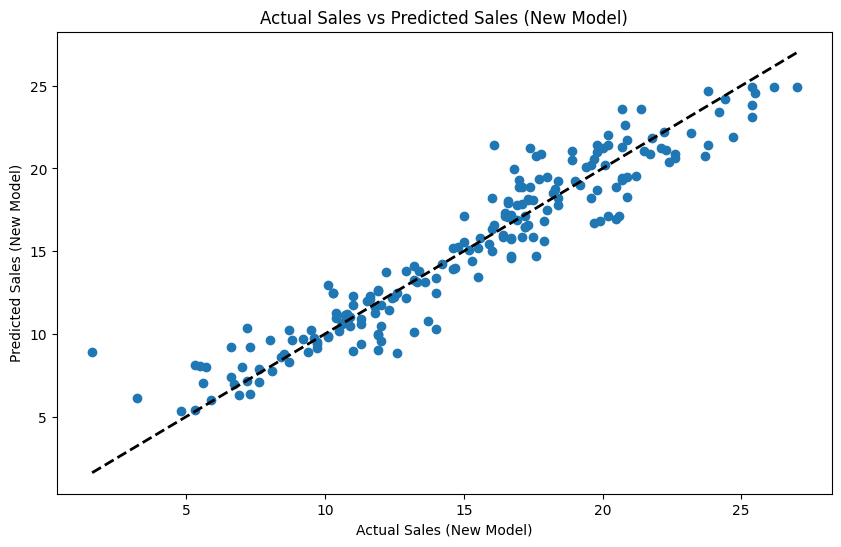

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_new, y_pred_new)
plt.xlabel("Actual Sales (New Model)")
plt.ylabel("Predicted Sales (New Model)")
plt.title("Actual Sales vs Predicted Sales (New Model)")
plt.plot([y_new.min(), y_new.max()], [y_new.min(), y_new.max()], 'k--', lw=2)
plt.show()

### 6.6. Verificar el impacto de los atributos (p-values) en el Nuevo Modelo

1. Ajusta el nuevo modelo usando statsmodels.
2. Imprime el summary de statsmodels.
3. Interpreta los p-values de las variables.

In [ ]:
import statsmodels.api as sm

X_new = df[['TV', 'Radio']]
y_new = df['Sales']

X_new = sm.add_constant(X_new)

model_sm_new = sm.OLS(y_new, X_new).fit()

print(model_sm_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Sun, 12 Oct 2025   Prob (F-statistic):          2.39e-100
Time:                        02:04:51   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0

##7. Conclusiones.

¿Cuál de los tres modelos construidos fue el mejor?

El mejor modelo fue el ultimo, debido a que nos dio el valor de coeficiente mas grande de todos 4.6309 lo que significa que tiene mayor relacion numerica con las ventas

¿Cuál fue el atributo que mas influencia tiene en las ventas?

El dato que tiene mayo correlacion de todos es el de la TV con las ventas, siendo de 0.9026 lo que indica un mayor grado de certeza en las predicciones